# 1. Introduction

<table class="tfo-notebook-buttons" align="left">
  
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/pantelis/PRML/blob/master/notebooks/ch01_Introduction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# You need to adjust the directory names below for your own account
# e.g. you may elect to create ms-notebooks dir or not

# Execute this cell once

# 1. Download the repo and set it as the current directory
%cd /content/drive/My Drive/Colab_Notebooks/ml-notebooks
!git clone https://github.com/pantelis/PRML
%cd /content/drive/My Drive/Colab_Notebooks/ml-notebooks/PRML

# 2. install the project/module
!python setup.py install



/content/drive/My Drive/Colab_Notebooks/ml-notebooks
fatal: destination path 'PRML' already exists and is not an empty directory.
/content/drive/My Drive/Colab_Notebooks/ml-notebooks/PRML
running install
running bdist_egg
running egg_info
writing prml.egg-info/PKG-INFO
writing dependency_links to prml.egg-info/dependency_links.txt
writing requirements to prml.egg-info/requires.txt
writing top-level names to prml.egg-info/top_level.txt
writing manifest file 'prml.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/prml
copying build/lib/prml/__init__.py -> build/bdist.linux-x86_64/egg/prml
creating build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/__init__.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prml/bayesnet/probability_function.py -> build/bdist.linux-x86_64/egg/prml/bayesnet
copying build/lib/prm

In [5]:
# 3. Add the project directory to the path
%cd /content/drive/My Drive/Colab_Notebooks/ml-notebooks/PRML
import os, sys
sys.path.append(os.getcwd())

/content/drive/My Drive/Colab_Notebooks/ml-notebooks/PRML


In [6]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(1234)

## 1.1. Example: Polynomial Curve Fitting

The cell below defines $p_{data}(y|x)$ and generates the $\hat p_{data}(y|x)$

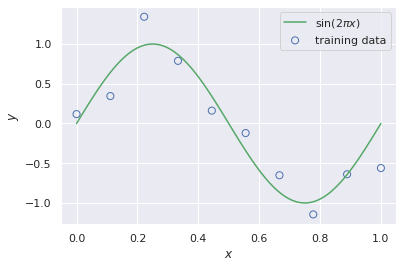

In [9]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size) # p(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape) 
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(func, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

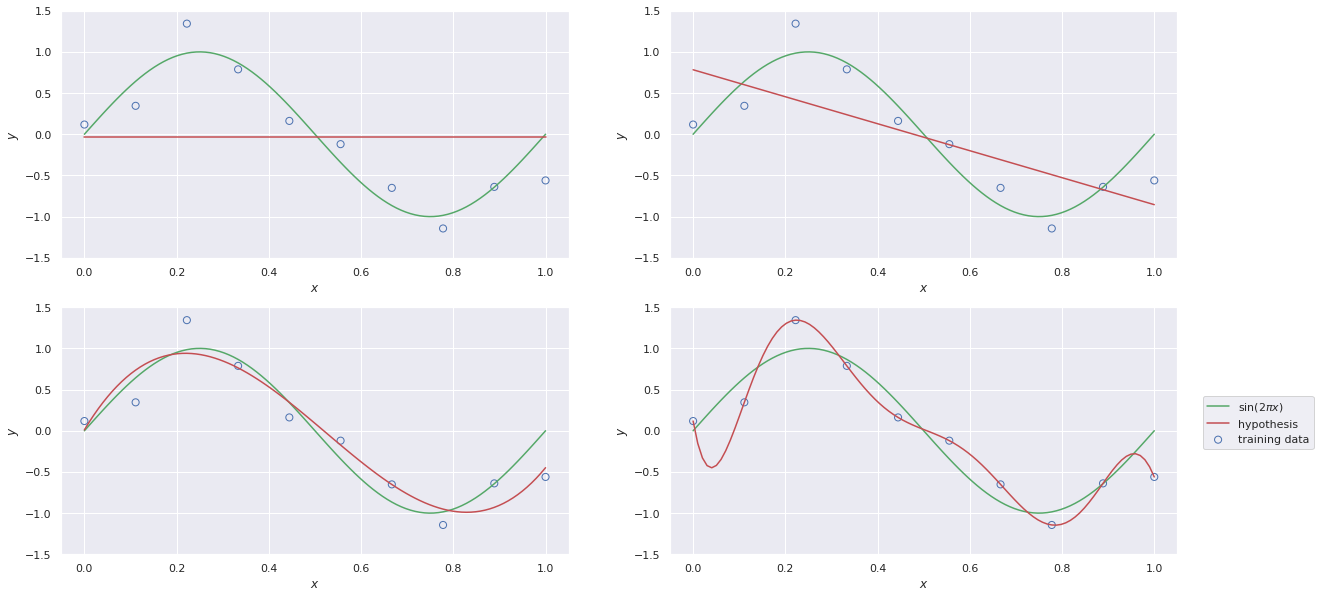

In [ ]:
plt.subplots(figsize=(20, 10))
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(2, 2, i + 1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="hypothesis")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
    plt.xlabel('$x$')
    plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### Parameter Table


In [ ]:
for i, degree in enumerate([1, 3, 6, 9]):
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    norm = 0.0
    print ('Degree:', degree, end='| ')
    for j in model.w:
      norm += j**2
      print(round(j, 3), end=' ')
    print('| squared norm:', '{:.3E}'.format(norm))

Degree: 1| 0.783 -1.638 | squared norm: 3.296E+00
Degree: 3| 0.011 9.292 -26.789 17.037 | squared norm: 1.094E+03
Degree: 6| 0.087 -2.363 94.523 -428.175 736.798 -563.096 161.694 | squared norm: 1.078E+06
Degree: 9| 0.118 -32.231 552.576 -2728.573 4762.784 2031.289 -19359.537 28382.471 -17856.184 4246.727 | squared norm: 1.552E+09


We can see that as the model complexity increases, so does the squared norm, indicating that as degree of the model goes so, so too do the weights at an exponential rate.

### Loss Function (RMSE)

The reason the loss function we are using is called the Root Mean Squared Error (RMSE) is due to the steps involved. Instead of just finidng the mean of the errors (in this case |y - y<sub>hat</sub>|), we instead take the mean of (y - y<sub>hat</sub>)<sup>2</sup> and then take the square root of the mean. Here is the equation for finding the RMSE: $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2}$$ The reason we take the square root in RMSE is to convert our error back to the original units, as we are taking the mean of the **squared** differences. Here, the square root is essentially standardizing our error, which is analagous to how, for a normal distribution, we take the square root of the variance to get the standard deviation. 



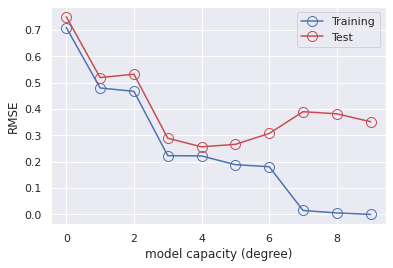

In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

### Model Complexity

Here, we see that as the model complexity increases up to a degree of 4, both the RMSE for both the training data and test data steadily decreases, meaning the model is doing a good job approximating y for both sets of data. However, the RMSE for the training and test data diverge after degree 4. In fact, by degree 9, the RMSE of the training data is 0.0 while for the test data it is nearly 0.35. What is the reason for this massive difference?

The answer is entirely due to overfitting. Overfitting occurs when a particular model becomes so complex that it is able to fit the training data almost entirely; however, it may pick up on correlations in the training data that don't correspond to a real-world scenario, and as a result is not able to accurately predit the future (in this case the test data). 

In this specific scenario, the training data may have contained outliers that the model at complexity 3 was not able to fit, and was therefore able to more accurately fit the test data. At complexity 9, the model was able to fit all of the training data, including the outliers, which actually made it less accurate at predicting the training data.

### Regularization

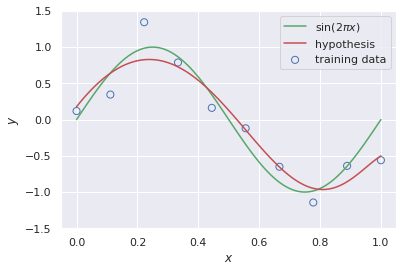

In [37]:
feature = PolynomialFeature(9)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)
y = model.predict(X_test)

#y = model.predict(X_test)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="hypothesis")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.annotate("M=9", xy=(-0.15, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.show()

As we can see above, the ridge regression model at a complexity of 9 is able to predict and match the test data much better than the linear regression model at the same complexity. But why is this the case? Well, with linear regression, the model aims to match the training dataset as close as possible, which is often achieved by increasing the model complexity. The drawback to this is that if the training data contained outliers, the model will capture those outliers as a part of its hypothesis, increasing the overall variability of the predictions generated by the model and failing to accurately model test/real-world data. 

Ridge regression combats this by taking the variance of the model into account (specifically, the norm of the weights) as a part of its loss function. Through a constant (in this case alpha) the user can specify the weight of the variance on the loss function, essentially the extent to which it is taken into account when choosing a particular hypothesis. In the case of the above model, alpha = e<sup>-3</sup>, so the variance is given a relatively high weight. That explains why the model does not match the training data exactly (failing to capture the outliers) but manages the match the test data much better.

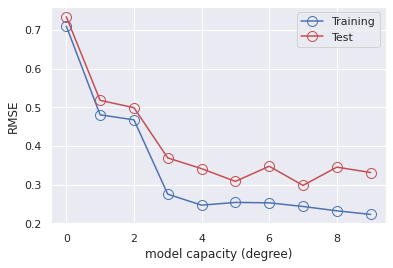

In [27]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = RidgeRegression(alpha=1e-3)
    model.fit(X_train, y_train)

    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(model.predict(X_test), y_test + np.random.normal(scale=0.25, size=len(y_test))))

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("model capacity (degree)")
plt.ylabel("RMSE")
plt.show()

### 1.2.6 Bayesian curve fitting

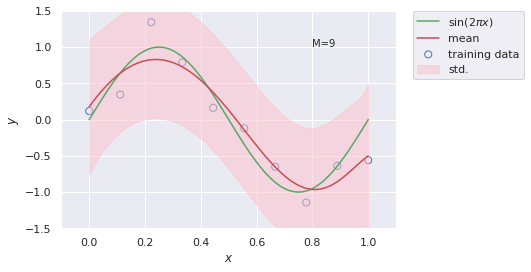

In [ ]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

y, y_err = model.predict(X_test, return_std=True)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")
plt.fill_between(x_test, y - y_err, y + y_err, color="pink", label="std.", alpha=0.5)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 1.5)
plt.annotate("M=9", xy=(0.8, 1))
plt.xlabel('$x$')
plt.ylabel('$y$') 
plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()